running marginal distribution

Attempting to parse dates...
	Using column 'name' as name. This needs match the taxon names in the tree!!
	Using column 'date' as date.

0.10	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences of
    	tips at positions with AMBIGUOUS bases. This resulted in unexpected
    	behavior is some cases and is no longer done by default. If you want to
    	replace those ambiguous sites with their most likely state, rerun with
    	`reconstruct_tip_states=True` or `--reconstruct-tip-states`.

0.47	TreeTime.reroot: with method or node: least-squares

0.47	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

0.94	###TreeTime.run: INITIAL ROUND

4.80	TreeTime.reroot: with method or node: least-squares

4.80	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

4.84	###TreeTime.run: rerunning timetree after rerooting

8.63	###TreeTime.run: ITERATION 1 out of 2 iterations

12.30	###TreeTime.run: ITERATION 2 out 

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

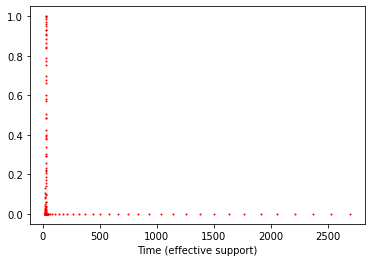

In [1]:
import numpy as np
from Bio import Phylo
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from treetime import TreeTime
from treetime.utils import parse_dates


if __name__ == '__main__':

    print("running marginal distribution")
    # load data and parse dates
    plt.ion()
    base_name = '../../../treetime_examples/data/h3n2_na/h3n2_na_20'

    dates = parse_dates(base_name+'.metadata.csv')
    tt_numerical = TreeTime(gtr='Jukes-Cantor', tree = base_name+'.nwk',
                  aln = base_name+'.fasta', verbose = 1, dates = dates, use_fft=False)

    tt_numerical.run(root="best", branch_length_mode='marginal', time_marginal=True, max_iter=2)

    tt_fft = TreeTime(gtr='Jukes-Cantor', tree = base_name+'.nwk',
                  aln = base_name+'.fasta', verbose = 1, dates = dates, use_fft=True)

    tt_fft.run(root="best", branch_length_mode='marginal', time_marginal=True, max_iter=2)
    
    def lookup_by_names(tree):
        names = {}
        for clade in tree.get_nonterminals():
            if clade.name:
                if clade.name in names:
                    raise ValueError("Duplicate key: %s" % clade.name)
                names[clade.name] = clade
        return names
    
    names_numerical = lookup_by_names(tt_numerical.tree)
    names_fft = lookup_by_names(tt_fft.tree)
    
    pp = PdfPages('FFT_Marginal_Likelihood_Plots.pdf')
    for key in names_numerical:
        n = names_numerical[key]
        fig = plt.plot(n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)), 'o', markersize=1, color='red', label='old (numerical)')
        #print(n.name)
        plt.xlabel("Time (effective support)")
        plt.ylable("P")
        plt.title("Accuracy Marginal Likelihood Calculation: " + str(n.name))
        n = names_fft[key]
        plt.plot(n.marginal_pos_LH.x/tt_fft.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)), 'o', markersize=1, color='blue', label='new (FFT)')
        plt.xlim(n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate)
        plt.legend()
        plt.show()
        #print(n.marginal_pos_LH.peak_pos/tt_marginal.date2dist.clock_rate)
        #print(n.marginal_pos_LH.effective_support/tt_marginal.date2dist.clock_rate )

In [2]:
    tt_numerical = TreeTime(gtr='Jukes-Cantor', tree = base_name+'.nwk',
                  aln = base_name+'.fasta', verbose = 1, dates = dates, debug=True, use_fft=False)

    tt_numerical.run(root="best", branch_length_mode='marginal', time_marginal=True, max_iter=2)


0.57	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences of
    	tips at positions with AMBIGUOUS bases. This resulted in unexpected
    	behavior is some cases and is no longer done by default. If you want to
    	replace those ambiguous sites with their most likely state, rerun with
    	`reconstruct_tip_states=True` or `--reconstruct-tip-states`.

1.58	TreeTime.reroot: with method or node: least-squares

1.59	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

2.56	###TreeTime.run: INITIAL ROUND

9.03	TreeTime.reroot: with method or node: least-squares

9.03	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.

9.43	###TreeTime.run: rerunning timetree after rerooting

20.10	###TreeTime.run: ITERATION 1 out of 2 iterations

26.97	###TreeTime.run: ITERATION 2 out of 2 iterations

32.15	###TreeTime.run: FINAL ROUND - confidence estimation via marginal
     	reconstruction


'success'

In [3]:
    for key in names_numerical:
        n = names_numerical[key]
        res = NodeInterpolator.convolve_fft(n.subtree_distribution, n.branch_length_interpolator)
        fig = plt.plot(n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)), 'o', markersize=1, color='red', label='old (numerical)')
        #print(n.name)
        plt.xlabel("Time (effective support)")
        plt.ylabel("P")
        plt.title("Accuracy Marginal Likelihood Calculation: " + str(n.name))
        plt.legend()
        plt.show()
        break

NameError: name 'NodeInterpolator' is not defined

In [4]:
from treetime.node_interpolator import NodeInterpolator

In [5]:
    for key in names_numerical:
        n = names_numerical[key]
        res = NodeInterpolator.convolve_fft(n.subtree_distribution, n.branch_length_interpolator)
        fig = plt.plot(n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)), 'o', markersize=1, color='red', label='old (numerical)')
        #print(n.name)
        plt.xlabel("Time (effective support)")
        plt.ylabel("P")
        plt.title("Accuracy Marginal Likelihood Calculation: " + str(n.name))
        plt.legend()
        plt.show()
        break

AttributeError: 'Clade' object has no attribute 'subtree_distribution'

In [6]:
res = NodeInterpolator.convolve_fft(n.marginal_pos_LH, n.branch_length_interpolator)

AttributeError: 'NoneType' object has no attribute 'fwhm'

In [7]:
n.branch_length

0.001

In [8]:
tt_numerical.gtr

In [9]:
from treetime.branch_len_interpolator import BranchLenInterpolator

In [10]:
bl = BranchLenInterpolator(n, tt_numerical.gtr, pattern_multiplicity = tt_numerical.data.multiplicity, min_width= tt_numerical.min_width,one_mutation=tt_numerical.one_mutation, branch_length_mode=tt_numerical.branch_length_mode)

Exception: Cannot create branch length interpolator for the root node.

In [11]:
tree.root


NameError: name 'tree' is not defined

In [12]:
tt_numerical.tree.root

Clade(_v=0, bad_branch=False, branch_length=0.001, clock_length=0.001, date='1996-10-30', dist2root=0.0, gamma=1.0, mutation_length=0.001, name='NODE_0000017')

In [13]:
n is tt_numerical.tree.root

False

In [14]:
n

Clade(_v=0, bad_branch=False, branch_length=0.001, clock_length=0.001, date='1996-10-30', dist2root=0.0, gamma=1.0, mutation_length=0.001, name='NODE_0000017')

In [15]:
n == tt_numerical.tree.root

False

In [17]:
n.name == tt_numerical.tree.root.name

True

In [18]:
    def lookup_by_names(tree):
        names = {}
        for clade in tree.get_nonterminals():
            if clade.name != tree.root.name:
                if clade.name in names:
                    raise ValueError("Duplicate key: %s" % clade.name)
                names[clade.name] = clade
        return names
        

In [19]:
names_numerical = lookup_by_names(tt_numerical.tree)

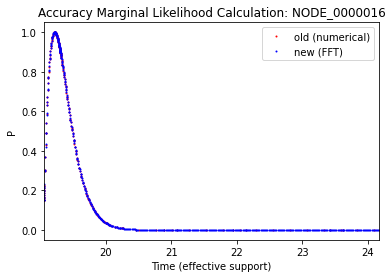

TypeError: unhashable type: 'list'

In [20]:
    pp = PdfPages('FFT_Marginal_Likelihood_Plots.pdf')
    for key in names_numerical:
        n = names_numerical[key]
        fig = plt.plot(n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)), 'o', markersize=1, color='red', label='old (numerical)')
        #print(n.name)
        plt.xlabel("Time (effective support)")
        plt.ylabel("P")
        plt.title("Accuracy Marginal Likelihood Calculation: " + str(n.name))
        n = names_fft[key]
        plt.plot(n.marginal_pos_LH.x/tt_fft.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)), 'o', markersize=1, color='blue', label='new (FFT)')
        plt.xlim(n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate)
        plt.legend()
        plt.show()
        pp.savefig(fig)
        break
        #print(n.marginal_pos_LH.peak_pos/tt_marginal.date2dist.clock_rate)
        #print(n.marginal_pos_LH.effective_support/tt_marginal.date2dist.clock_rate )
    pp.close()

In [21]:
bl = BranchLenInterpolator(n, tt_numerical.gtr, pattern_multiplicity = tt_numerical.data.multiplicity, min_width= tt_numerical.min_width,one_mutation=tt_numerical.one_mutation, branch_length_mode=tt_numerical.branch_length_mode)
    res = NodeInterpolator.convolve_fft(n.marginal_pos_LH, bl)

IndentationError: unexpected indent (undefined, line 2)

In [22]:
bl = BranchLenInterpolator(n, tt_numerical.gtr, pattern_multiplicity = tt_numerical.data.multiplicity, min_width= tt_numerical.min_width,one_mutation=tt_numerical.one_mutation, branch_length_mode=tt_numerical.branch_length_mode)
res = NodeInterpolator.convolve_fft(n.marginal_pos_LH, bl)

In [23]:
res


In [24]:
plot(res)

NameError: name 'plot' is not defined

TypeError: float() argument must be a string or a number, not 'NodeInterpolator'

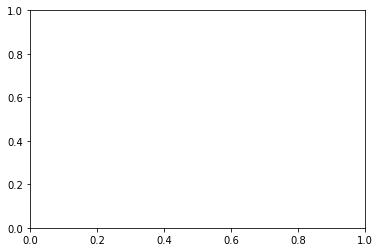

In [25]:
plt.plot(res)

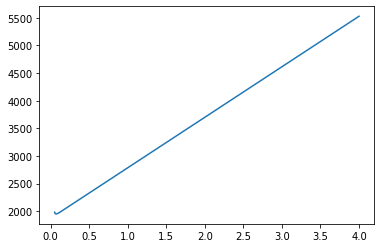

In [26]:
plt.plot(res.x, res.y)

In [27]:
plt.plot(res.x, np.exp(-res.y+min(res.y))

SyntaxError: unexpected EOF while parsing (undefined, line 1)

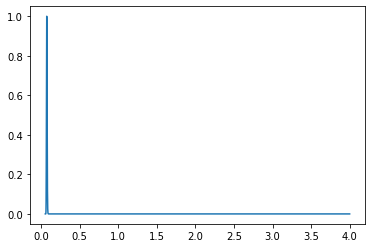

In [28]:
plt.plot(res.x, np.exp(-res.y+min(res.y)))

In [29]:
len(n.marginal_pos_LH.x)

1491

In [30]:
n = names_numerical[key]

In [31]:
len(n.marginal_pos_LH.x)

454

In [32]:
1491*np.log(1491)

10895.038651314224

In [33]:
454*454

206116

In [34]:
x_num = n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate


In [35]:
x_num([0,1])

TypeError: 'numpy.ndarray' object is not callable

In [36]:
x_num(np.linspace(0, 10, num=41, endpoint=True))

TypeError: 'numpy.ndarray' object is not callable

In [37]:
n-marginal_pos_LH._func(np.linspace(0, 10, num=41, endpoint=True))

NameError: name 'marginal_pos_LH' is not defined

In [38]:
n.marginal_pos_LH._func(np.linspace(0, 10, num=41, endpoint=True))

array([1.00000000e+10, 6.72473002e+02, 1.47665420e+03, 2.13851996e+03,
       2.67230947e+03, 3.09529284e+03, 3.43500970e+03, 3.70950442e+03,
       3.93356949e+03, 4.12016976e+03, 4.27886200e+03, 4.41563614e+03,
       4.53496457e+03, 4.64063095e+03, 4.73511101e+03, 4.85200070e+03,
       5.02786402e+03, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10,
       1.00000000e+10])

In [39]:
numer = interp1d(n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)))

NameError: name 'interp1d' is not defined

In [40]:
from scipy.interpolate import interp1d
numer = interp1d(n.marginal_pos_LH.x/tt_numerical.date2dist.clock_rate, np.exp(-n.marginal_pos_LH.y+min(n.marginal_pos_LH.y)))

In [41]:
numer(np.linspace(0, 10, num=41, endpoint=True))

ValueError: A value in x_new is below the interpolation range.

In [42]:
numer(np.linspace(n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate, num=41, endpoint=True))

TypeError: _linspace_dispatcher() missing 1 required positional argument: 'stop'

In [43]:
np.linspace(n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate[0], n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate[1], num=41, endpoint=True)

IndexError: invalid index to scalar variable.

In [44]:
n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate[0]

IndexError: invalid index to scalar variable.

In [45]:
(n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate)[0]

19.061645711643905

In [46]:
np.linspace((n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate)[0], (n.marginal_pos_LH.effective_support/tt_numerical.date2dist.clock_rate)[1], num=41, endpoint=True)

array([19.06164571, 19.18922078, 19.31679585, 19.44437092, 19.57194599,
       19.69952106, 19.82709613, 19.95467121, 20.08224628, 20.20982135,
       20.33739642, 20.46497149, 20.59254656, 20.72012163, 20.8476967 ,
       20.97527177, 21.10284684, 21.23042191, 21.35799698, 21.48557205,
       21.61314712, 21.74072219, 21.86829726, 21.99587233, 22.1234474 ,
       22.25102247, 22.37859754, 22.50617261, 22.63374769, 22.76132276,
       22.88889783, 23.0164729 , 23.14404797, 23.27162304, 23.39919811,
       23.52677318, 23.65434825, 23.78192332, 23.90949839, 24.03707346,
       24.16464853])

In [47]:
np.log(4)

1.3862943611198906

In [48]:
np.log(4, 2)

TypeError: return arrays must be of ArrayType

In [49]:
np.log(4, base=2)

TypeError: log() got an unexpected keyword argument 'base'

In [50]:
np.log2(4)

2.0